In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("eopto_nic_tap_scan_prbs_eye_prod.csv")
df.head()

,LOG_DIR,NIC,ITERATION,POST,MAIN,PRE,lane,HBER
0,log_01_Thu_05_19_25_34,nic223,1,-100,350,-100,0,0.04
1,log_01_Thu_05_19_25_34,nic223,1,-100,350,-100,0,0.04
2,log_01_Thu_05_19_25_34,nic223,1,-100,350,-100,0,0.04
3,log_01_Thu_05_19_25_34,nic223,1,-100,350,-100,0,0.04
4,log_01_Thu_05_19_25_34,nic223,1,-100,350,-100,0,0.04


In [3]:
df.describe()

,ITERATION,POST,MAIN,PRE,lane,HBER
count,4.062208e+06,4.062208e+06,4.062208e+06,4.062208e+06,4.062208e+06,4.062208e+06
mean,5.210487e-01,-1.764558e-01,5.935720e+02,-5.873456e+00,3.500000e+00,1.821479e-03
std,5.476979e-01,7.077283e+01,1.286294e+02,7.017058e+01,2.291288e+00,1.456823e-02
min,0.000000e+00,-1.000000e+02,3.500000e+02,-1.000000e+02,0.000000e+00,3.400000e-24
25%,0.000000e+00,-5.000000e+01,5.000000e+02,-5.000000e+01,1.750000e+00,5.700000e-23
50%,0.000000e+00,0.000000e+00,6.500000e+02,0.000000e+00,3.500000e+00,3.800000e-22
75%,1.000000e+00,5.000000e+01,7.000000e+02,5.000000e+01,5.250000e+00,2.500000e-21
max,2.000000e+00,1.000000e+02,7.500000e+02,1.000000e+02,7.000000e+00,5.000000e-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062208 entries, 0 to 4062207
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   LOG_DIR    object 
 1   NIC        object 
 2   ITERATION  int64  
 3   POST       int64  
 4   MAIN       int64  
 5   PRE        int64  
 6   lane       int64  
 7   HBER       float64
dtypes: float64(1), int64(5), object(2)
memory usage: 247.9+ MB


In [5]:
# POST, MAIN, PRE, -> HBER (Minimize)

# select dataset where NIC == nic223 and lane == 0
df_nic223 = df[df['NIC'] == 'nic223']
df_nic223_lane0 = df_nic223[df_nic223['lane'] == 0]

df_nic223_lane0.describe()

,ITERATION,POST,MAIN,PRE,lane,HBER
count,50048.000000,50048.000000,50048.000000,50048.000000,50048.0,5.004800e+04
mean,0.514066,-0.255754,557.800512,-7.416880,0.0,2.025704e-03
std,0.548597,70.801289,135.735680,69.498179,0.0,1.154869e-02
min,0.000000,-100.000000,350.000000,-100.000000,0.0,4.400000e-24
25%,0.000000,-50.000000,450.000000,-50.000000,0.0,6.200000e-23
50%,0.000000,0.000000,600.000000,0.000000,0.0,4.100000e-22
75%,1.000000,50.000000,700.000000,50.000000,0.0,1.300000e-21
max,2.000000,100.000000,750.000000,100.000000,0.0,1.800000e-01


In [6]:
df_new = df.groupby(['PRE', 'MAIN', 'POST']).agg(
    avg_HBER=('HBER', 'mean'),
    worst_HBER=('HBER', 'max')
).reset_index()

df_new.head()

,PRE,MAIN,POST,avg_HBER,worst_HBER
0,-100,350,-100,4.221972e-02,0.069000
1,-100,350,-50,3.858662e-02,0.190000
2,-100,350,0,3.259293e-02,0.210000
3,-100,350,50,1.162054e-07,0.000007
4,-100,350,100,1.096429e-02,0.028000


In [7]:
df_new.describe()

,PRE,MAIN,POST,avg_HBER,worst_HBER
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,0.000000,550.000000,0.000000,2.636948e-03,3.078811e-02
std,70.888121,137.274255,70.888121,7.512112e-03,9.860218e-02
min,-100.000000,350.000000,-100.000000,1.514643e-23,9.100000e-23
25%,-50.000000,437.500000,-50.000000,6.476688e-22,7.500000e-21
50%,0.000000,550.000000,0.000000,3.955840e-20,3.450000e-18
75%,50.000000,662.500000,50.000000,2.415869e-04,2.500000e-02
max,100.000000,750.000000,100.000000,4.221972e-02,5.000000e-01


In [ ]:
from algorithm.GA import HBERGeneticAlgorithm
from utils import suggest_ga_params

bounds = {'PRE': (-100, 100), 'MAIN': (350, 800), 'POST': (-100, 100)}
step_sizes = {'PRE': 50, 'MAIN': 50, 'POST': 50}
population_size, generations = suggest_ga_params(bounds, step_sizes)
print("Suggested Population Size and Generations:", population_size, generations)
hber_ga = HBERGeneticAlgorithm(
    df_new, 
    bounds, 
    step_sizes, 
    population_size=population_size, 
    generations=generations
)
best = hber_ga.run()
print("Best solution:", best)
print("Fitness value:", hber_ga.evaluate_point(*best))

Suggested Population Size and Generations: 25 10
Best solution: [-100, 500, -100]
Fitness value: 0.15640005168132118


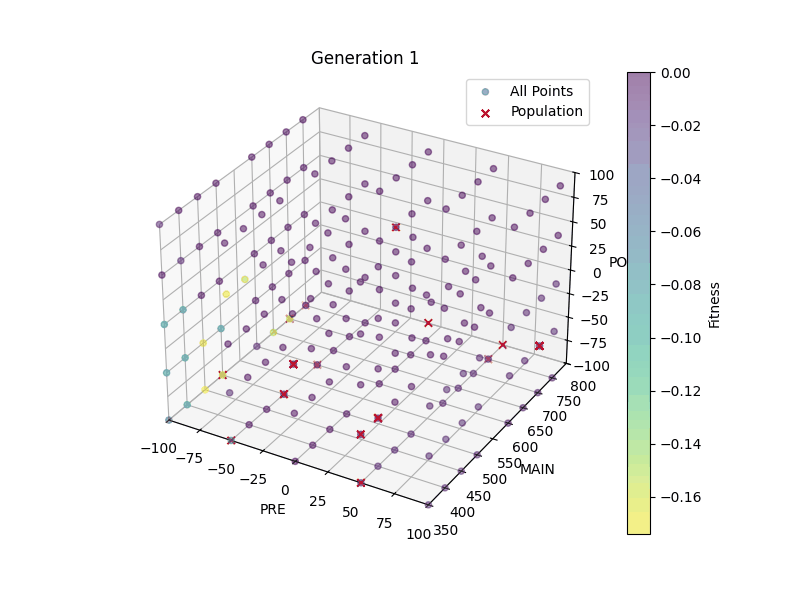

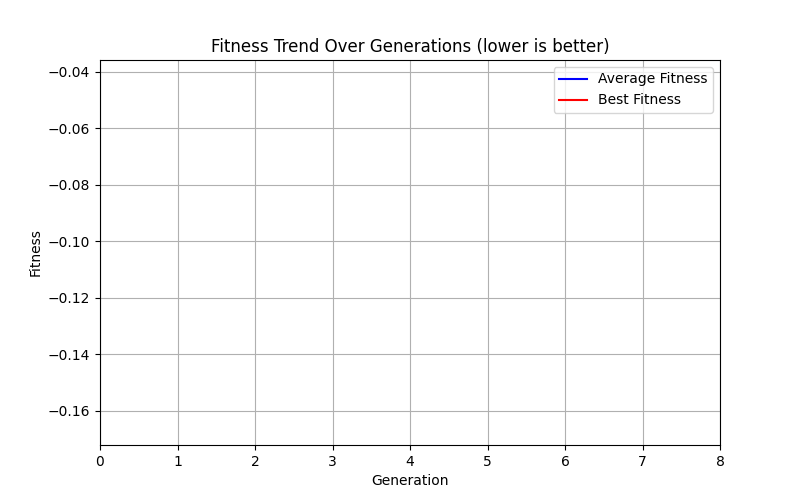

In [9]:
from IPython.display import Image, display

# Display population evolution animation
gif_bytes = hber_ga.animate_population()
display(Image(data=gif_bytes.getvalue()))

# Display fitness trend animation
gif_bytes2 = hber_ga.animate_fitness_trend()
display(Image(data=gif_bytes2.getvalue()))